In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [9]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [15]:
x = df.iloc[:,[3,4]]

In [17]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


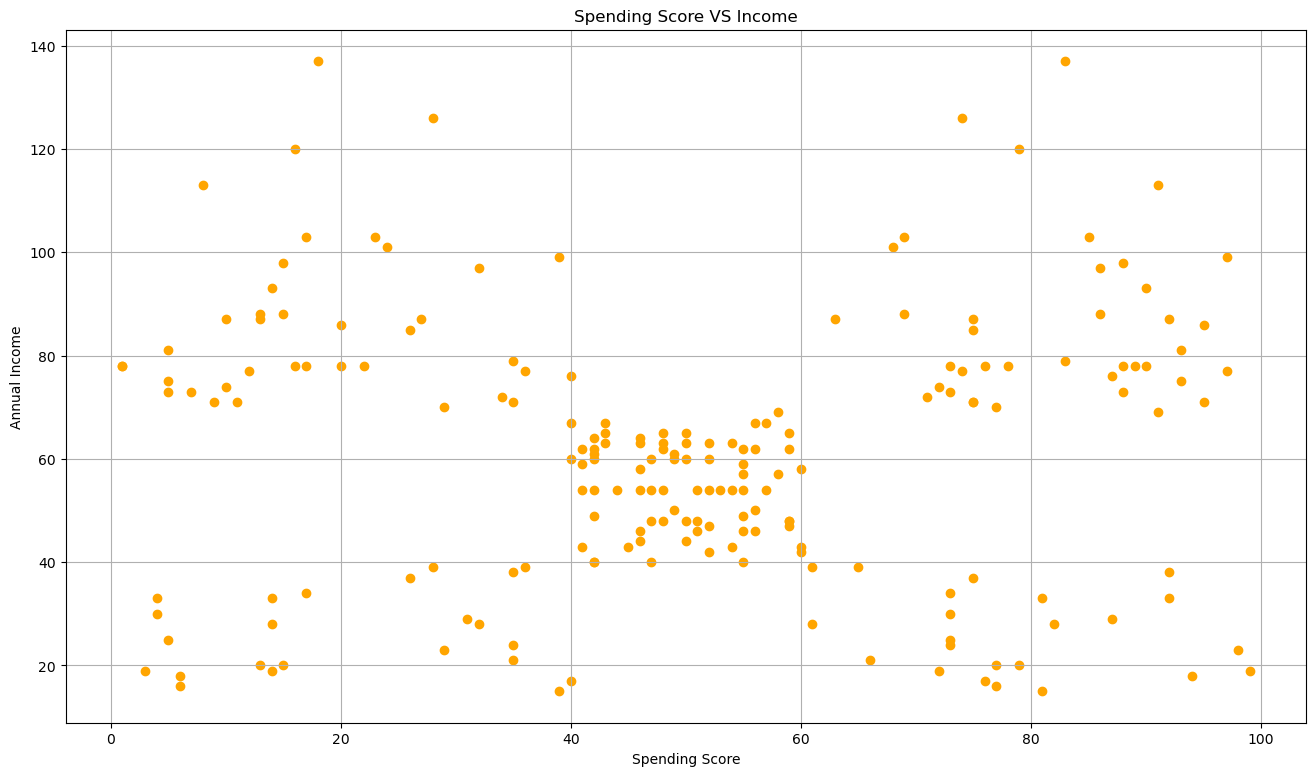

In [23]:
plt.figure(figsize=(16,9))

plt.title('Spending Score VS Income')
plt.xlabel('Spending Score')
plt.ylabel('Annual Income')
plt.scatter(df['Spending Score (1-100)'], df['Annual Income (k$)'], color = 'orange')
plt.grid();

In [29]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3)

In [31]:
labels = km.fit_predict(x)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [33]:
km.inertia_

106348.37306211118

In [35]:
# Find different values of inertia for different no. of clusters
# Plot the graph k-value vs inertia
# Figure out optimal value of no. of clusters

In [43]:
sse = []

for k in range(1,16):
    km = KMeans(n_clusters = k, random_state = 0)
    labels = km.fit_predict(x)
    sse.append(km.inertia_)

In [45]:
sse

[269981.28,
 185917.14253928524,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 38858.9599751439,
 31969.426550235483,
 29858.483597603947,
 22209.85160802555,
 20786.93669205916,
 18612.222868009685,
 17083.672501709316,
 16511.947370563892,
 15599.148331445116,
 14697.298899626934]

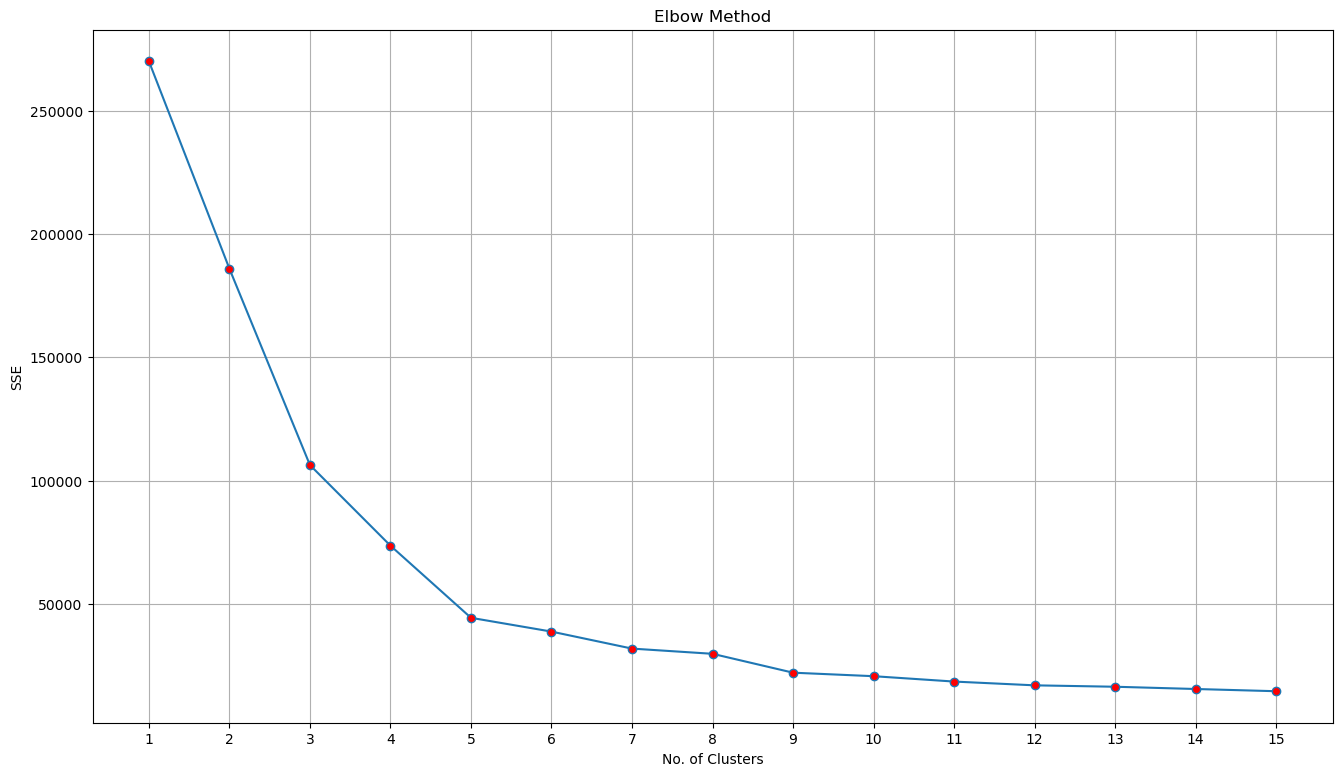

In [47]:
plt.figure(figsize=(16,9))

plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('SSE')
plt.xticks(range(1,17))
plt.plot(range(1,16), sse, marker = 'o', mfc = 'red')
plt.grid()

In [ ]:
!pip install kneed

In [51]:
from kneed import KneeLocator

ModuleNotFoundError: No module named 'kneed'

In [ ]:
kl = KneedLocator(range(1,16), sse, direction = 'decreasing', curve = 'convex')

In [ ]:
kl.elbow

In [55]:
# Build using 5 clusters

km = KMeans(n_clusters = 5, random_state=0)

In [57]:
labels = km.fit_predict(x)
labels

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

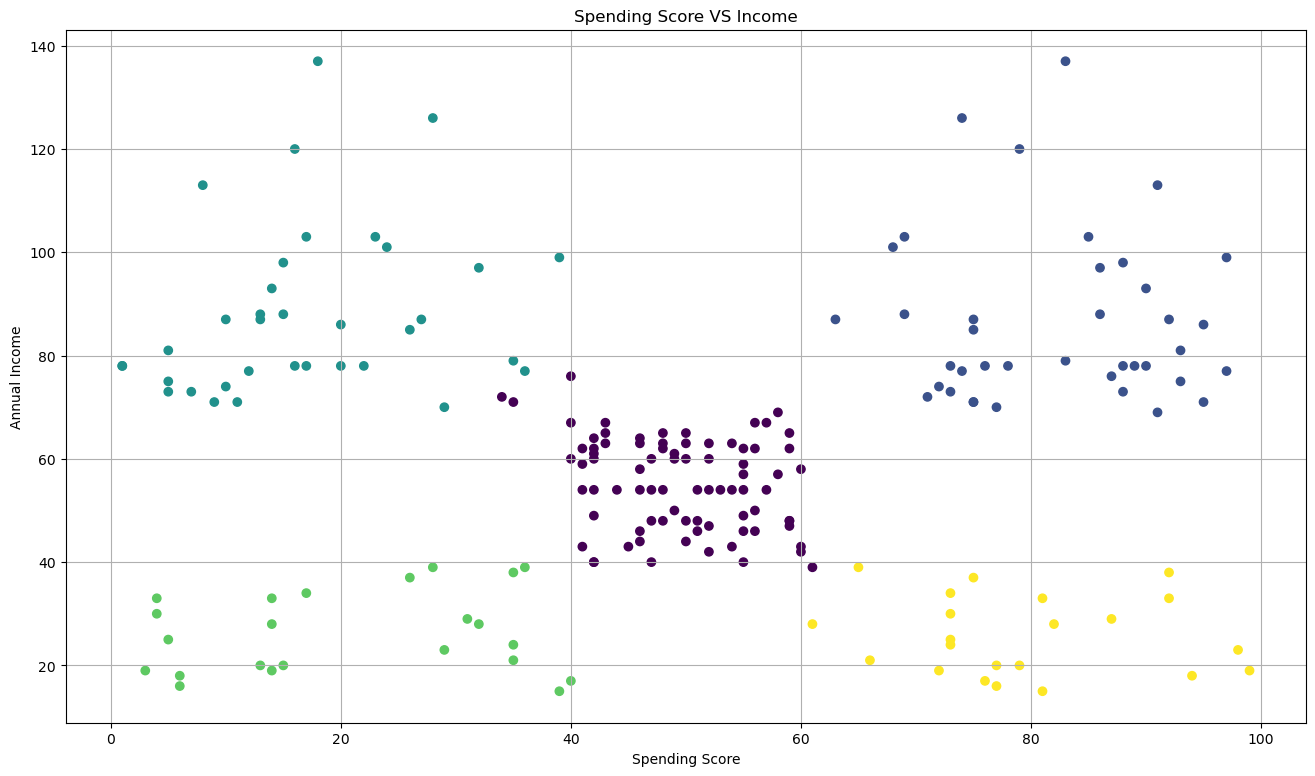

In [59]:
plt.figure(figsize=(16,9))

plt.title('Spending Score VS Income')
plt.xlabel('Spending Score')
plt.ylabel('Annual Income')
plt.scatter(df['Spending Score (1-100)'], df['Annual Income (k$)'], c = labels)
plt.grid();

In [61]:
high_spenders = df[labels==0]
high_spenders

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
43,44,Female,31,39,61
46,47,Female,50,40,55
47,48,Female,27,40,47
48,49,Female,29,40,42
49,50,Female,31,40,42
...,...,...,...,...,...
121,122,Female,38,67,40
122,123,Female,40,69,58
126,127,Male,43,71,35
132,133,Female,25,72,34
